## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Path
path = r"C:\Users\Natalia\Documents\World University Rank"

In [4]:
# Import the times data

df = pd.read_csv(os.path.join(path, '02 Original Data', 'timesData.csv'))

### 2. Data cleaning

In [5]:
df.columns

Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year'],
      dtype='object')

In [6]:
df.head(20)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,0,2011
1,1,California Institute of Technology,United States of America,95.7,56.0,98.2,99.9,97.0,94.8,"2,243",6.9,27%,33 : 67,2012
2,1,California Institute of Technology,United States of America,96.3,59.8,99.4,99.7,95.6,95.5,"2,243",6.9,27%,33 : 67,2013
3,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
4,1,California Institute of Technology,United States of America,92.2,67.0,98.1,99.7,89.1,94.3,"2,243",6.9,27%,33 : 67,2015
5,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,"2,243",6.9,27%,33 : 67,2016
6,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
7,2,Harvard University,United States of America,95.8,67.5,97.4,99.8,35.9,93.9,"20,152",8.9,25%,0,2012
8,2,Stanford University,United States of America,94.8,57.2,98.9,99.8,63.8,93.9,"15,596",7.8,22%,42:58:00,2012
9,2,Stanford University,United States of America,95.0,56.6,98.8,99.3,62.4,93.7,"15,596",7.8,22%,42:58:00,2013


In [7]:
df.shape

(1201, 14)

In [8]:
# Rename the columns in the same way as in Exercise 6.2.

df.rename(columns = {'world_rank' : 'World rank', 'university_name' : 'University name', 'teaching' : 'Teaching', 'total_score' : 'Total score', 'num_students' : 'No Students', 'student_staff_ratio' : 'Student Staff ratio', 'international_students' : 'International Students', 'female_male_ratio' : 'Female/Male ratio'}, inplace = True)

In [9]:
df.columns

Index(['World rank', 'University name', 'country', 'Teaching', 'international',
       'research', 'citations', 'income', 'Total score', 'No Students',
       'Student Staff ratio', 'International Students', 'Female/Male ratio',
       'year'],
      dtype='object')

##### Missing values

In [10]:
# Check for missing values

df.isnull().sum()

# Missing values on the following: international, income, Total score, No Students, Student Staff ratio, International Students, Female/Male ratio

World rank                0
University name           0
country                   0
Teaching                  0
international             0
research                  0
citations                 0
income                    0
Total score               0
No Students               0
Student Staff ratio       0
International Students    0
Female/Male ratio         0
year                      0
dtype: int64

##### Duplicates check

In [11]:
dups = df.duplicated()

In [12]:
dups.shape # No dups

(1201,)

##### Extreme values checks

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Teaching', ylabel='Density'>

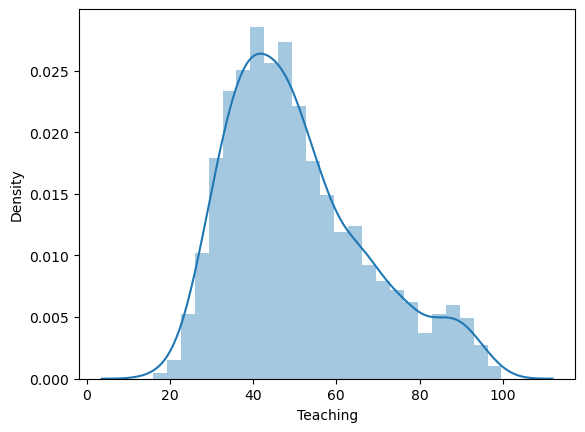

In [13]:
sns.distplot(df['Teaching'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [14]:
df['Teaching'].mean() # Check the mean

50.730807660283155

In [15]:
df['Teaching'].median() # Check the median

47.5

In [16]:
df['Teaching'].max() # Check the max

99.7

### 3. Data prep for regression analysis 

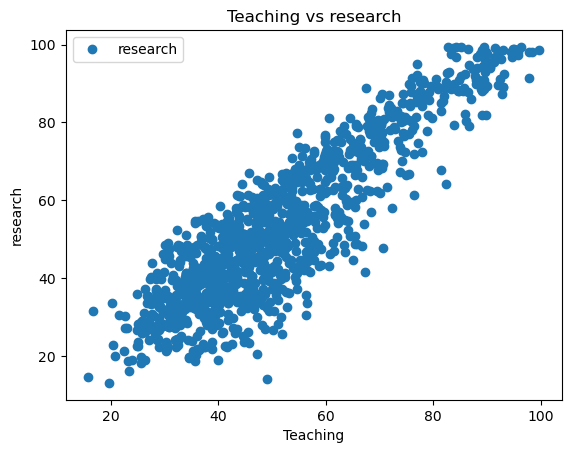

In [17]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Teaching', y='research',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Teaching vs research')  
plt.xlabel('Teaching')  
plt.ylabel('research')  
plt.show()

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Teaching'].values.reshape(-1,1)
y = df['research'].values.reshape(-1,1)

In [19]:
X

array([[99.7],
       [95.7],
       [96.3],
       ...,
       [19.7],
       [44.6],
       [34.1]])

In [20]:
y

array([[98.7],
       [98.2],
       [99.4],
       ...,
       [13.1],
       [25.1],
       [33.3]])

In [21]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [22]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [23]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

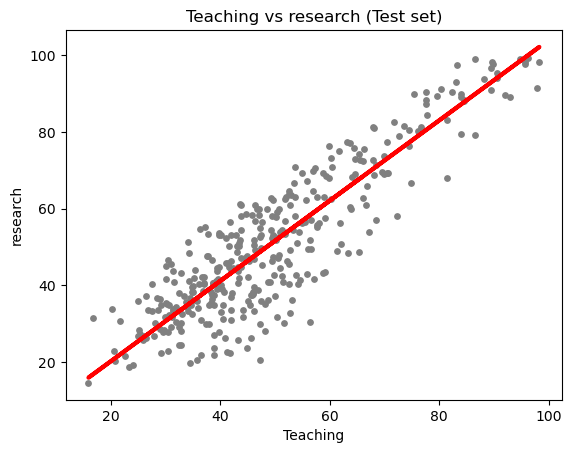

In [25]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Teaching vs research (Test set)')
plot_test.xlabel('Teaching')
plot_test.ylabel('research')
plot_test.show()

### Write your own interpretation of how well the line appears to fit the data in a markdown cell.
#### It has a positive slope, which indicates a positive relationship (as X rises, so does y).

In [26]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [27]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.04720358]]
Mean squared error:  80.74469445895949
R2 score:  0.7878507179913125


In [28]:
y_predicted

array([[ 67.81427892],
       [ 54.72423416],
       [ 86.34978231],
       [ 68.33788071],
       [ 42.26251154],
       [ 49.69765697],
       [ 61.84521851],
       [ 33.67544217],
       [ 39.95866366],
       [ 21.00427884],
       [ 57.34224311],
       [ 36.08401041],
       [ 65.92931248],
       [ 54.41007308],
       [ 61.112176  ],
       [ 44.98524085],
       [ 45.50884264],
       [ 62.26409994],
       [ 87.81586733],
       [ 39.53978223],
       [ 40.48226545],
       [ 37.8642565 ],
       [ 33.15184038],
       [ 16.81546451],
       [ 39.64450259],
       [ 94.09908881],
       [ 55.45727666],
       [ 67.70955856],
       [ 41.42474867],
       [ 45.82300372],
       [ 99.33510672],
       [102.16255639],
       [ 54.20063237],
       [ 41.32002832],
       [ 35.87456969],
       [ 33.57072181],
       [ 70.43228788],
       [ 43.41443548],
       [ 26.76389854],
       [ 54.30535272],
       [ 30.32439071],
       [ 61.94993887],
       [ 48.23157195],
       [ 75

In [29]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,72.6,67.814279
1,63.6,54.724234
2,97.5,86.349782
3,62.8,68.337881
4,45.8,42.262512
5,35.2,49.697657
6,76.3,61.845219
7,28.0,33.675442
8,34.8,39.958664
9,20.1,21.004279


### Compare the predicted y values with the actual y values in a dataframe.
#### The summary statistics of the model confirm that the model is accurate.Which can also be seen by the variance in the actual vs predicted values. An R2 score of 0.839 indicates a strong fit and the MSE also confirms this.

##### Compare how the regression fits the training set

In [30]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [31]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [32]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.04720358]]
Mean squared error:  78.05629915425199
R2 score:  0.7982633162705529


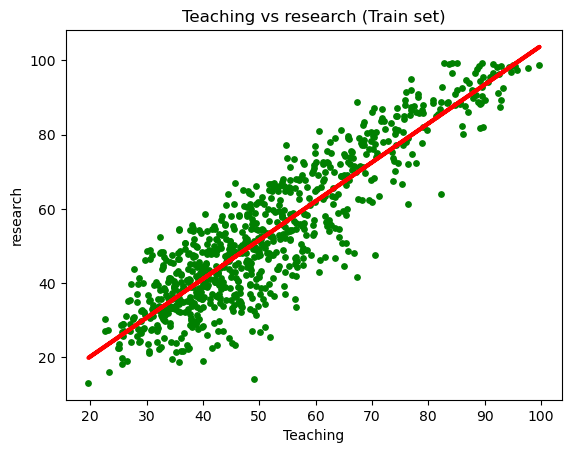

In [33]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Teaching vs research (Train set)')
plot_test.xlabel('Teaching')
plot_test.ylabel('research')
plot_test.show()